In [18]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import scipy.io
def load_emnist(file_path='emnist-bymerge.mat'):
    """
    Loads training and test data with ntr and nts training and test samples
    The `file_path` is the location of the `eminst-balanced.mat`.
    """    
    
    # Load the MATLAB file
    mat = scipy.io.loadmat(file_path)
    
    # Get the training data
    Xtr = mat['dataset'][0][0][0][0][0][0][:]
    ntr = Xtr.shape[0]
    ytr = mat['dataset'][0][0][0][0][0][1][:].reshape(ntr).astype(int)
    
    # Get the test data
    Xts = mat['dataset'][0][0][1][0][0][0][:]
    nts = Xts.shape[0]
    yts = mat['dataset'][0][0][1][0][0][1][:].reshape(nts).astype(int)
    
    print("%d training samples, %d test samples loaded" % (ntr, nts))

    return [Xtr, Xts, ytr, yts]

In [20]:
Xtr, Xts, ytr, yts = load_emnist()

697932 training samples, 116323 test samples loaded


In [21]:
print(Xtr.shape,Xts.shape,ytr.shape,yts.shape)

(697932, 784) (116323, 784) (697932,) (116323,)


In [22]:
Xtrd=np.reshape(Xtr,(697932,28,28),order='F')
Xtsd=np.reshape(Xts,(116323,28,28),order='F')

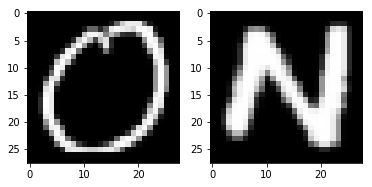

In [23]:
plt.subplot(1,2,1)
plt.imshow(Xtrd[np.random.randint(1,20000),:,:],cmap='Greys_r')
plt.subplot(1,2,2)
plt.imshow(Xtsd[np.random.randint(1,10000),:,:],cmap='Greys_r')

In [24]:
ntr = 35000
nts = 10000

# TODO: proper decide the number of samples and the ratio between dig and let

# Create sub-sampled training and test data
nsamp = Xtr.shape[0]
Iperm = np.random.permutation(nsamp)
Xtr1 = Xtrd[Iperm[:ntr],:,:]
ytr1 = ytr[Iperm[:ntr]]
nsamp = Xts.shape[0]
Iperm = np.random.permutation(nsamp)
Xts1 = Xtsd[Iperm[:nts],:,:]
yts1 = yts[Iperm[:nts]]

In [25]:
# first we do it in 47 classes and add a dense layer to 36 classes

In [26]:
from __future__ import print_function
# from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model #save and load models
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import keras.backend as K

In [27]:
x_train = Xtr1.astype('float32')
x_test = Xts1.astype('float32')
x_train /= 255
x_test /= 255
x_train=x_train.reshape((ntr,28,28,1))
x_test=x_test.reshape((nts,28,28,1))
y_train=ytr1.reshape((len(ytr1),1))
y_test=yts1.reshape((len(yts1),1))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(35000, 28, 28, 1) (10000, 28, 28, 1) (35000, 1) (10000, 1)


In [28]:
r=np.where(y_train==36)
y_train[r]=10
t=np.where(y_test==36)
y_test[t]=10

r=np.where(y_train==37)
y_train[r]=11
t=np.where(y_test==37)
y_test[t]=11

r=np.where(y_train==38)
y_train[r]=13
t=np.where(y_test==38)
y_test[t]=13

r=np.where(y_train==39)
y_train[r]=14
t=np.where(y_test==39)
y_test[t]=14

r=np.where(y_train==40)
y_train[r]=15
t=np.where(y_test==40)
y_test[t]=15

r=np.where(y_train==41)
y_train[r]=16
t=np.where(y_test==41)
y_test[t]=16

r=np.where(y_train==42)
y_train[r]=17
t=np.where(y_test==42)
y_test[t]=17

r=np.where(y_train==43)
y_train[r]=23
t=np.where(y_test==43)
y_test[t]=23

r=np.where(y_train==44)
y_train[r]=26
t=np.where(y_test==44)
y_test[t]=26

r=np.where(y_train==45)
y_train[r]=27
t=np.where(y_test==45)
y_test[t]=27

r=np.where(y_train==46)
y_train[r]=29
t=np.where(y_test==46)
y_test[t]=29

In [29]:
batch_size = 64
epochs = 8
lrate = 0.05
decay = lrate/epochs

In [30]:
# TODO: 36/62 channels?
K.clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 padding='valid', 
                 input_shape=x_train.shape[1:],
                 activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))   #+0.01
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(28, (3, 3), padding='valid', activation='relu'))   #+0.00
#model.add(BatchNormalization())

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
#model.add(Dense(62, activation='relu'))   #+0.01
#model.add(BatchNormalization())
model.add(Dense(47, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(36, activation='softmax'))

In [31]:
# initiate Adam optimizer
opt = keras.optimizers.adam(lr=lrate, decay=decay)

# Let's train the model using Adam
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 800)               3200      
__________

In [32]:
seed=7
np.random.seed(seed)
hist_basic = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,
                       validation_data=(x_test, y_test),shuffle=True)
print('Done!')

Train on 35000 samples, validate on 10000 samples
Epoch 1/8
35000/35000 [==============================] - 52s 1ms/step - loss: 0.6977 - acc: 0.7706 - val_loss: 0.4569 - val_acc: 0.8496
Epoch 2/8
35000/35000 [==============================] - 52s 1ms/step - loss: 0.3757 - acc: 0.8621 - val_loss: 0.3938 - val_acc: 0.8617
Epoch 3/8
35000/35000 [==============================] - 48s 1ms/step - loss: 0.3037 - acc: 0.8843 - val_loss: 0.3504 - val_acc: 0.8775
Epoch 4/8
35000/35000 [==============================] - 47s 1ms/step - loss: 0.2695 - acc: 0.8966 - val_loss: 0.3471 - val_acc: 0.8806
Epoch 5/8
35000/35000 [==============================] - 48s 1ms/step - loss: 0.2368 - acc: 0.9068 - val_loss: 0.3508 - val_acc: 0.8787
Epoch 6/8
35000/35000 [==============================] - 49s 1ms/step - loss: 0.2137 - acc: 0.9151 - val_loss: 0.3557 - val_acc: 0.8801
Epoch 7/8
35000/35000 [==============================] - 52s 1ms/step - loss: 0.1946 - acc: 0.9219 - val_loss: 0.3670 - val_acc: 0.879

In [ ]:
# then we go directly through 36 classes

In [33]:
# TODO: 36/62 channels?
K.clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), 
                 padding='valid', 
                 input_shape=x_train.shape[1:],
                 activation='relu'))
#model.add(BatchNormalization())
#model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))   #+0.01
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(28, (3, 3), padding='valid', activation='relu'))   #+0.00
#model.add(BatchNormalization())

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
#model.add(Dense(62, activation='relu'))   #+0.01
#model.add(BatchNormalization())
model.add(Dense(36, activation='softmax'))

# initiate Adam optimizer
opt = keras.optimizers.adam(lr=lrate, decay=decay)

# Let's train the model using Adam
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
print(model.summary())

seed=7
np.random.seed(seed)
hist_basic = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,
                       validation_data=(x_test, y_test),shuffle=True)
print('Done!')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 800)               3200      
__________

In [ ]:
# 47 to 36: 0.8858, trainable paras:448,301
# 36: 0.8826, trainable paras:440,836